In [1]:
import pandas as pd
import numpy as np
import os 
from sklearn.feature_selection import chi2
from scipy import stats
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
df = pd.read_csv('C:\\Users\\joann\\Ćwiczenia python\covid_data_nonas.csv', index_col=[0])

In [3]:
df_covid = df[df['CLASIFFICATION_FINAL'] == 1] #odfiltrowani tylko z covidem
df_covid

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,died,age_group,severity
0,2,1,1,0,03/05/2020,0.0,1.0,65,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.0,1,4.0,4.0
2,2,1,2,1,09/06/2020,1.0,0.0,55,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1,0.0,1,3.0,4.0
4,2,1,2,0,21/06/2020,0.0,0.0,68,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1,0.0,1,4.0,4.0
5,2,1,1,1,9999-99-99,0.0,1.0,40,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.0,0,2.0,2.0
6,2,1,1,0,9999-99-99,0.0,0.0,64,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.0,0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047933,1,13,1,1,9999-99-99,0.0,0.0,77,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1,0.0,0,4.0,1.0
1047934,1,13,1,0,9999-99-99,0.0,0.0,55,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1,0.0,0,3.0,1.0
1047935,1,13,2,0,9999-99-99,0.0,0.0,70,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.0,0,4.0,1.0
1047936,2,13,2,0,9999-99-99,0.0,0.0,32,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.0,0,2.0,1.0


In [4]:
kolumny_chi =  df_covid[['SEX', 'PATIENT_TYPE','INTUBED', 'PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'died', 'age_group', 'severity']]


**chi 2**

In [5]:
column_names=kolumny_chi.columns
chisqmatrix=pd.DataFrame(df,columns=column_names,index=column_names)

In [6]:
outercnt=0
innercnt=0
for icol in column_names: 
   for jcol in column_names:
      mycrosstab=pd.crosstab(kolumny_chi[icol],kolumny_chi[jcol])

stat,p,dof,expected=stats.chi2_contingency(mycrosstab)
chisqmatrix.iloc[outercnt,innercnt]=round(p,5)

cntexpected=expected[expected<5].size
perexpected=((expected.size-cntexpected)/expected.size)*100

In [7]:
if perexpected<20:
 chisqmatrix.iloc[outercnt,innercnt]=2
 
 if icol==jcol:
    chisqmatrix.iloc[outercnt,innercnt]=0.00
 innercnt=innercnt+1
 outercnt=outercnt+1
 innercnt=0

In [8]:
outercnt=0
innercnt=0
for icol in column_names:
    
    for jcol in column_names:
        
       mycrosstab=pd.crosstab(kolumny_chi[icol],kolumny_chi[jcol])
       stat,p,dof,expected=stats.chi2_contingency(mycrosstab)
       chisqmatrix.iloc[outercnt,innercnt]=round(p,3)
       cntexpected=expected[expected<5].size
       perexpected=((expected.size-cntexpected)/expected.size)*100
      
       if perexpected<20:
            chisqmatrix.iloc[outercnt,innercnt]=2 
       if icol==jcol:
           chisqmatrix.iloc[outercnt,innercnt]=0.00
       innercnt=innercnt+1
    outercnt=outercnt+1
    innercnt=0


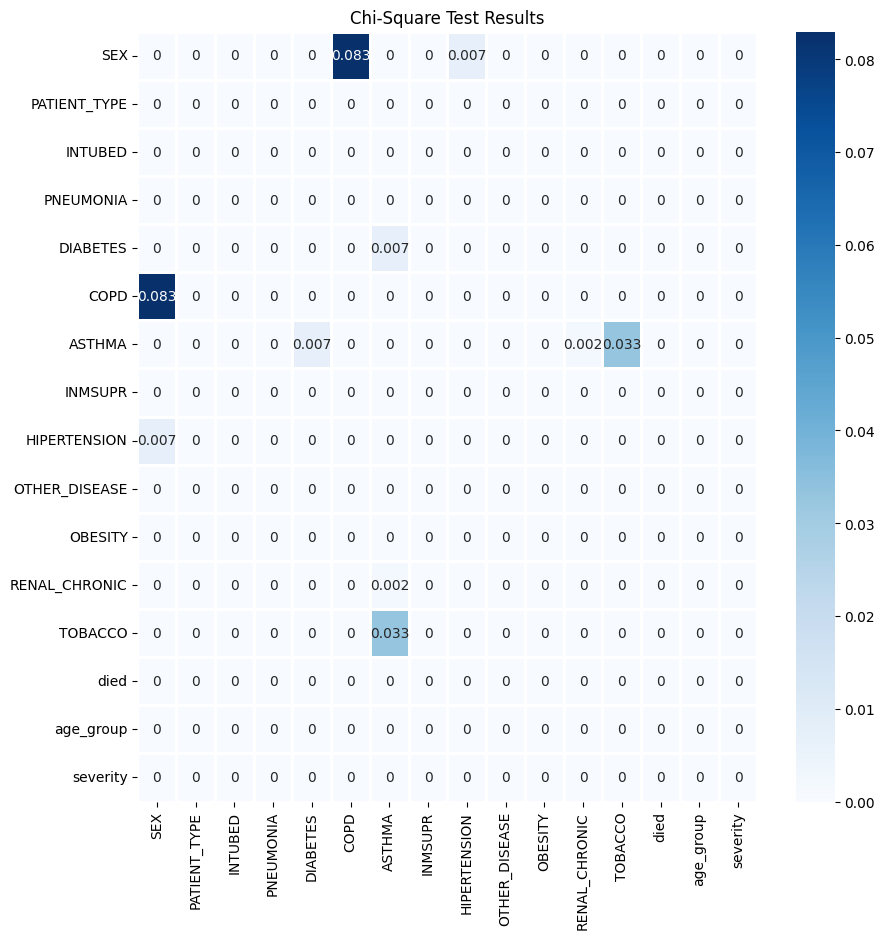

In [9]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(chisqmatrix.astype(np.float64), annot=True, linewidths=1, cmap='Blues')
plt.title('Chi-Square Test Results')
plt.show()

**Współczynnik phi**

In [10]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [11]:
import phik

In [12]:
kolumny_phi_chorobywspol_cechy =  df_covid[['died', 'SEX', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']]
print(kolumny_phi_chorobywspol_cechy)
kolumny_phi_stan =  df_covid[['died','PATIENT_TYPE', 'INTUBED', 'PNEUMONIA']]
print(kolumny_phi_stan)

         died  SEX  PREGNANT  DIABETES  COPD  ASTHMA  INMSUPR  HIPERTENSION   
0           1    1       0.0       0.0   0.0     0.0      0.0           1.0  \
2           1    2       0.0       1.0   0.0     0.0      0.0           0.0   
4           1    2       0.0       1.0   0.0     0.0      0.0           1.0   
5           0    1       0.0       0.0   0.0     0.0      0.0           0.0   
6           0    1       0.0       0.0   0.0     0.0      0.0           0.0   
...       ...  ...       ...       ...   ...     ...      ...           ...   
1047933     0    1       0.0       1.0   0.0     0.0      1.0           1.0   
1047934     0    1       0.0       1.0   0.0     0.0      0.0           0.0   
1047935     0    2       0.0       0.0   0.0     0.0      0.0           1.0   
1047936     0    2       0.0       0.0   0.0     0.0      0.0           0.0   
1047937     0    1       0.0       0.0   0.0     0.0      0.0           0.0   

         OTHER_DISEASE  OBESITY  RENAL_CHRONIC  TOB

In [13]:
wspol_phi = kolumny_phi_chorobywspol_cechy.phik_matrix()
stan_phi = kolumny_phi_stan.phik_matrix()


interval columns not set, guessing: ['died', 'SEX', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']
interval columns not set, guessing: ['died', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA']


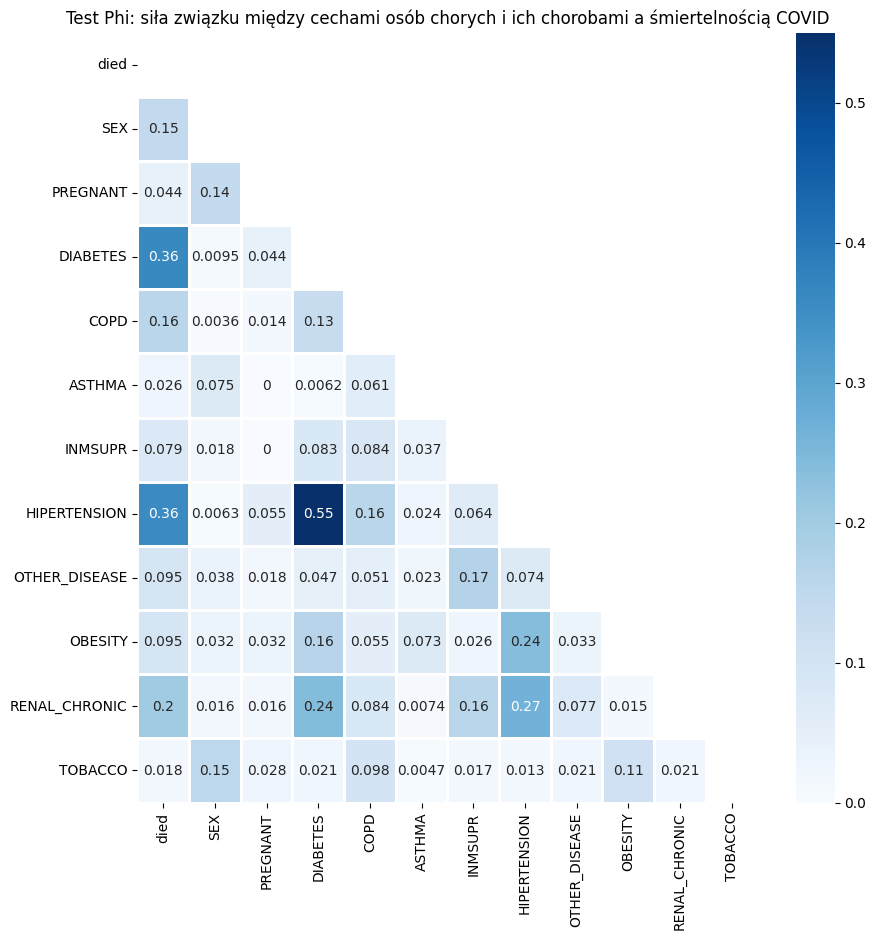

In [15]:
fig = plt.figure(figsize=(10,10))
mask = np.triu(np.ones_like(wspol_phi), k=0)
sns.heatmap(wspol_phi, annot=True, linewidths=1, cmap='Blues', mask=mask)
plt.title('Test Phi: siła związku między cechami osób chorych i ich chorobami a śmiertelnością COVID')
plt.show()


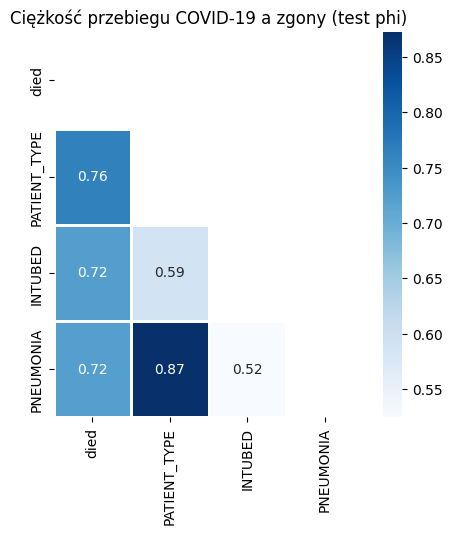

In [16]:

fig = plt.figure(figsize=(5,5))
mask = np.triu(np.ones_like(stan_phi), k=0)
sns.heatmap(stan_phi, annot=True, linewidths=1, cmap='Blues', mask=mask)
plt.title('Ciężkość przebiegu COVID-19 a zgony (test phi)')
plt.show()

**Współczynnik V Cramera**

In [17]:
import numpy as np
import scipy
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

In [18]:
import itertools

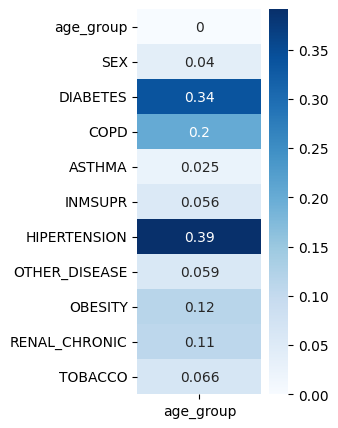

In [19]:
def cramers_corrected_stat(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))



#Wiek a cechy
cols = ['age_group', 'SEX','DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']
corrM = np.zeros((len(cols),len(cols)))
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(df[col1], df[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(2, 5))
ax = sns.heatmap(corr[['age_group']], annot=True, cmap='Blues')


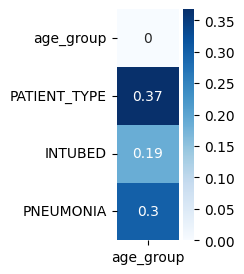

In [20]:
#Wiek a stan
cols = ['age_group',  'PATIENT_TYPE','INTUBED', 'PNEUMONIA']
corrM = np.zeros((len(cols),len(cols)))
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(df[col1], df[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(1, 3))
ax = sns.heatmap(corr[['age_group']], annot=True, cmap='Blues')


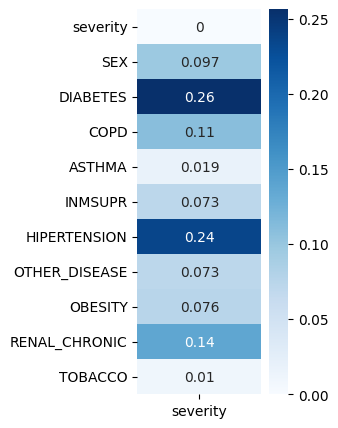

In [21]:

# stan a cechy
cols = ['severity', 'SEX', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']
corrM = np.zeros((len(cols),len(cols)))
(len(cols),len(cols))
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(df[col1], df[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(2, 5))
ax = sns.heatmap(corr[['severity']], annot=True, cmap='Blues')